In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = '/content/drive/MyDrive/20240819 CBCT MRI 데이터 정리 - 수정1.xlsx'

df = pd.read_excel(file_path, sheet_name='정리본')

# 'SEX (여성-F, 남성-M)' 컬럼명을 'SEX'로 변경
df.rename(columns={'SEX (여성-F, 남성-M)': 'SEX'}, inplace=True)
df['SEX'] = df['SEX'].map({'F': 0, 'M': 1})

# 빈문자열을 NaN으로 변경하기
df.replace("", np.nan, inplace=True)

columns = df.columns
print(len(columns))
print(columns)
df.head()


9
Index(['No.', 'Patient ID', 'NAME', 'SEX', 'AGE',
       'CBCT_Rt OA (Osteoarthritis) (0=normal, 1=OA)',
       'CBCT_Lt OA  (Osteoarthritis) (0=normal, 1=OA)',
       'MRI_Rt OA (0=normal, 1=OA)', 'MRI_Lt OA (0=normal, 1=OA)'],
      dtype='object')


,No.,Patient ID,NAME,SEX,AGE,"CBCT_Rt OA (Osteoarthritis) (0=normal, 1=OA)","CBCT_Lt OA (Osteoarthritis) (0=normal, 1=OA)","MRI_Rt OA (0=normal, 1=OA)","MRI_Lt OA (0=normal, 1=OA)"
0,1,20708532,사막동,0.0,68,1,1,NaN,NaN
1,2,20711690,이유진,0.0,23,0,0,NaN,NaN
2,3,20711556,이동규,1.0,26,1,1,NaN,NaN
3,4,20288547,지영선,1.0,66,0,0,NaN,NaN
4,5,20711599,배일웅,1.0,77,1,1,NaN,NaN


In [ ]:
df.describe()

,No.,Patient ID,SEX,AGE,"CBCT_Rt OA (Osteoarthritis) (0=normal, 1=OA)","CBCT_Lt OA (Osteoarthritis) (0=normal, 1=OA)","MRI_Rt OA (0=normal, 1=OA)","MRI_Lt OA (0=normal, 1=OA)"
count,1219.000000,1.219000e+03,1218.000000,1219.000000,1219.000000,1219.000000,191.000000,191.000000
mean,462.941756,2.060617e+07,0.297209,36.970468,0.417555,0.472518,0.340314,0.345550
std,324.044771,3.750387e+05,0.457217,18.655043,0.493358,0.499449,0.475060,0.476797
min,1.000000,1.069074e+07,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000
25%,156.500000,2.059719e+07,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000
50%,432.000000,2.067196e+07,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000
75%,746.500000,2.068991e+07,1.000000,51.000000,1.000000,1.000000,1.000000,1.000000
max,1064.000000,2.760186e+07,1.000000,90.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# CBCT와 MRI 이미지 갯수 확인

# CBCT 관련 컬럼들기
cbct_columns = ['CBCT_Rt OA (Osteoarthritis) (0=normal, 1=OA)', 'CBCT_Lt OA  (Osteoarthritis) (0=normal, 1=OA)']

# MRI 관련 컬럼들
mri_columns = ['MRI_Rt OA (0=normal, 1=OA)', 'MRI_Lt OA (0=normal, 1=OA)']

# CBCT 값 개수 확인 (0과 1의 개수)
cbct_counts = df[cbct_columns].apply(pd.Series.value_counts)
print("CBCT 데이터 개수:")
print(cbct_counts)

# MRI 값 개수 확인 (0과 1의 개수)
mri_counts = df[mri_columns].apply(pd.Series.value_counts)
print("\nMRI 데이터 개수:")
print(mri_counts)

CBCT 데이터 개수:
   CBCT_Rt OA (Osteoarthritis) (0=normal, 1=OA)  \
0                                           710   
1                                           509   

   CBCT_Lt OA  (Osteoarthritis) (0=normal, 1=OA)  
0                                            643  
1                                            576  

MRI 데이터 개수:
     MRI_Rt OA (0=normal, 1=OA)  MRI_Lt OA (0=normal, 1=OA)
0.0                         126                         125
1.0                          65                          66


In [ ]:
# 데이터 저장
data = pd.DataFrame(df)
print(f'data.shape : {data.shape}')
data.to_csv('/content/drive/MyDrive/241023_TMJ OA data.csv', index=False, encoding = 'utf-8')

data.shape : (1219, 9)


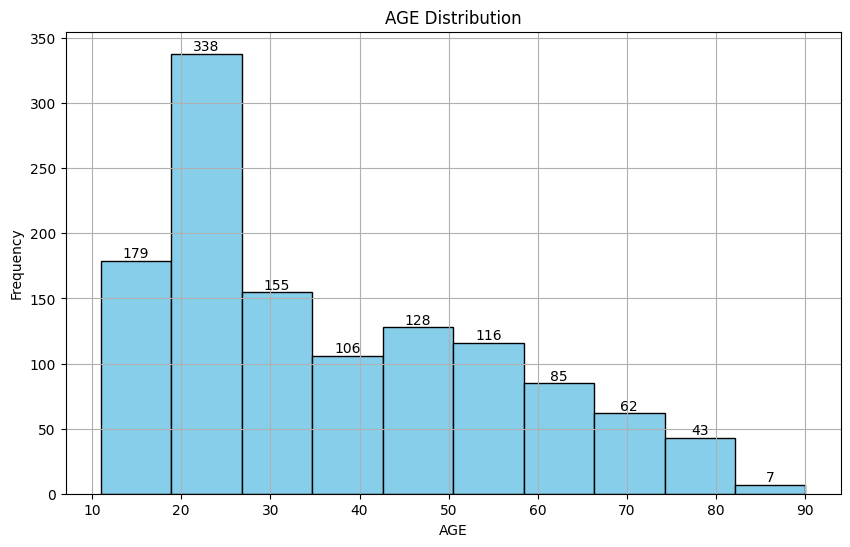

In [ ]:
# 나이 분포를 히스토그램으로 시각화

plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(df['AGE'], bins=10, color='skyblue', edgecolor='black')

# 막대 위에 빈도 수치 표시
for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width() / 2, count,    # 막대의 중앙에 텍스트 배치
             f'{int(count)}', ha='center', va='bottom', fontsize=10)  # 수치를 정수로 표시

plt.title('AGE Distribution')
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


<ipython-input-11-478c27c254ca>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='CBCT_Label', data=df, palette='Set2')


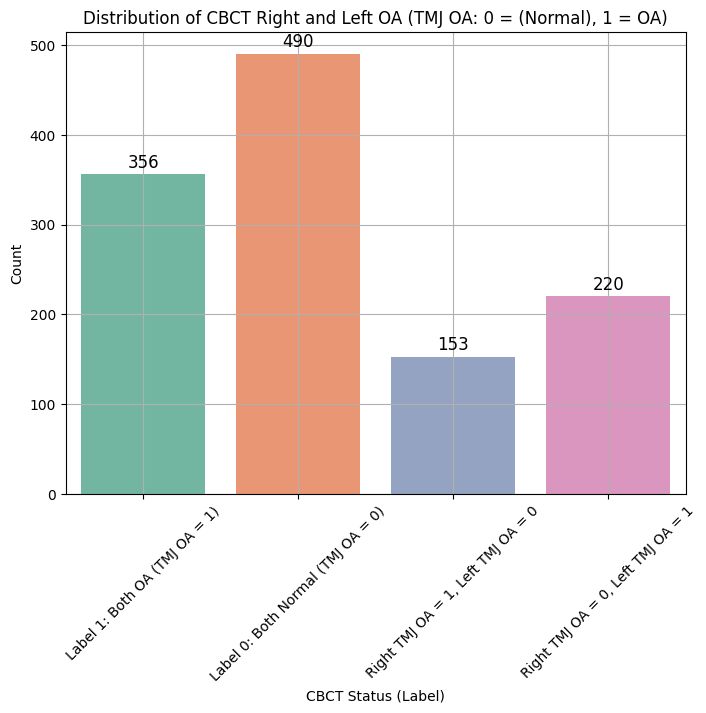

In [ ]:
# 새로운 상태 열 생성 (Label 개념 포함)
df['CBCT_Label'] = 'None'  # 기본 값 설정

# 1. 양쪽 모두 정상인 경우 (TMJ OA = 0, Normal)
df.loc[(df['CBCT_Rt OA (Osteoarthritis) (0=normal, 1=OA)'] == 0) &
       (df['CBCT_Lt OA  (Osteoarthritis) (0=normal, 1=OA)'] == 0), 'CBCT_Label'] = 'Label 0: Both Normal (TMJ OA = 0)'

# 2. 양쪽 모두 OA인 경우 (TMJ OA = 1, 양성)
df.loc[(df['CBCT_Rt OA (Osteoarthritis) (0=normal, 1=OA)'] == 1) &
       (df['CBCT_Lt OA  (Osteoarthritis) (0=normal, 1=OA)'] == 1), 'CBCT_Label'] = 'Label 1: Both OA (TMJ OA = 1)'

# 3. 한쪽만 OA (Right Normal, Left OA)
df.loc[(df['CBCT_Rt OA (Osteoarthritis) (0=normal, 1=OA)'] == 0) &
       (df['CBCT_Lt OA  (Osteoarthritis) (0=normal, 1=OA)'] == 1), 'CBCT_Label'] = 'Right TMJ OA = 0, Left TMJ OA = 1'

# 4. 한쪽만 OA (Right OA, Left Normal)
df.loc[(df['CBCT_Rt OA (Osteoarthritis) (0=normal, 1=OA)'] == 1) &
       (df['CBCT_Lt OA  (Osteoarthritis) (0=normal, 1=OA)'] == 0), 'CBCT_Label'] = 'Right TMJ OA = 1, Left TMJ OA = 0'

# CBCT Label별 분포 시각화
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='CBCT_Label', data=df, palette='Set2')

# 막대 위에 숫자(빈도 수) 표시
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# 그래프 제목 및 축 레이블 설정 (Label 개념 포함)
plt.title('Distribution of CBCT Right and Left OA (TMJ OA: 0 = (Normal), 1 = OA)')
plt.xlabel('CBCT Status (Label)')
plt.ylabel('Count')
plt.xticks(rotation=45)  # X축 레이블이 잘 보이도록 45도 회전
plt.grid(True)

# 그래프 출력
plt.show()

<ipython-input-12-5a9ee5819a39>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y='AGE', data=both_oa_df, palette='Set2')


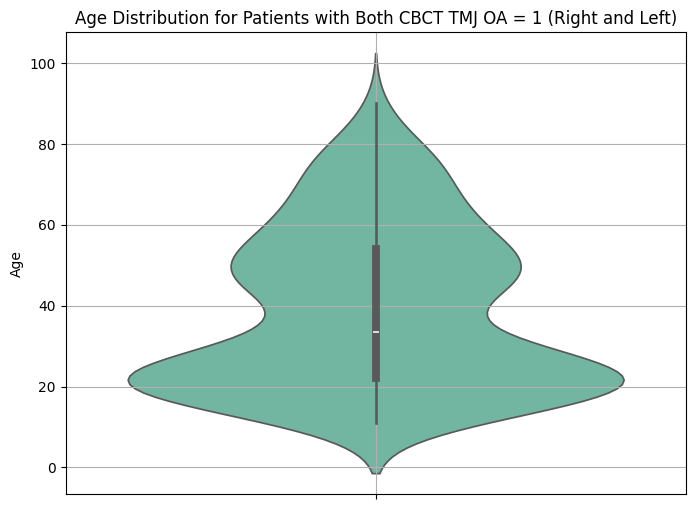

In [ ]:
# CBCT_Rt OA와 CBCT_Lt OA가 모두 OA(1)인 경우만 필터링
both_oa_df = df[(df['CBCT_Rt OA (Osteoarthritis) (0=normal, 1=OA)'] == 1) &
                (df['CBCT_Lt OA  (Osteoarthritis) (0=normal, 1=OA)'] == 1)]

# 나이 분포 시각화 (양쪽 모두 OA label이 1일 때)
plt.figure(figsize=(8, 6))
sns.violinplot(y='AGE', data=both_oa_df, palette='Set2')

# 그래프 제목 및 축 레이블 설정 (표현 수정)
plt.title('Age Distribution for Patients with Both CBCT TMJ OA = 1 (Right and Left)')
plt.ylabel('Age')
plt.grid(True)

# 그래프 출력
plt.show()

<ipython-input-13-22ba2903b1fb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y='AGE', data=both_normal_df, palette='Set2')


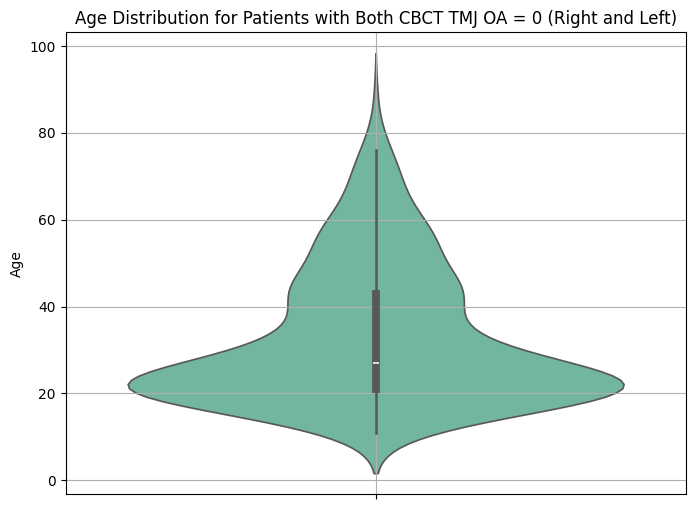

In [ ]:
# CBCT_Rt OA와 CBCT_Lt OA가 모두 Normal(0)인 경우만 필터링
both_normal_df = df[(df['CBCT_Rt OA (Osteoarthritis) (0=normal, 1=OA)'] == 0) &
                    (df['CBCT_Lt OA  (Osteoarthritis) (0=normal, 1=OA)'] == 0)]

plt.figure(figsize=(8, 6))
sns.violinplot(y='AGE', data=both_normal_df, palette='Set2')

# 그래프 제목 및 축 레이블 설정
plt.title('Age Distribution for Patients with Both CBCT TMJ OA = 0 (Right and Left)')
plt.ylabel('Age')
plt.grid(True)

# 그래프 출력
plt.show()

<ipython-input-16-f5e25be87769>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  both_oa_df['SEX'] = both_oa_df['SEX'].map({0: 'Female', 1: 'Male'})
<ipython-input-16-f5e25be87769>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='SEX', data=both_oa_df, palette='Set2')


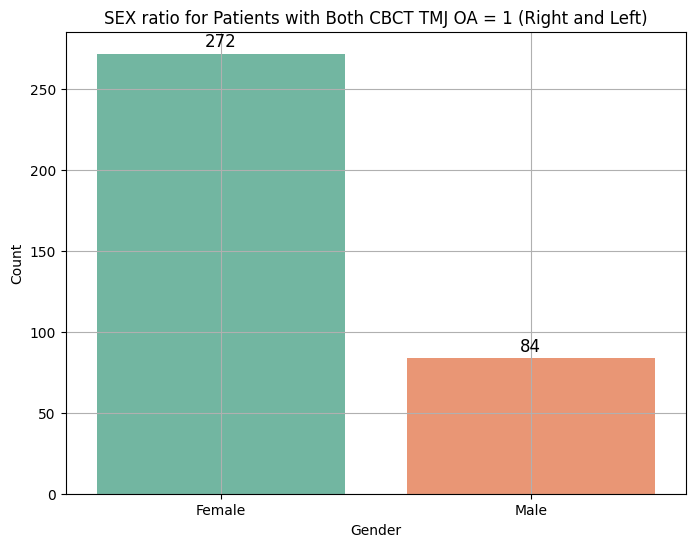

In [ ]:
# CBCT_Rt OA와 CBCT_Lt OA가 모두 OA(1)인 경우만 필터링
both_oa_df = df[(df['CBCT_Rt OA (Osteoarthritis) (0=normal, 1=OA)'] == 1) &
                (df['CBCT_Lt OA  (Osteoarthritis) (0=normal, 1=OA)'] == 1)]

# 성별을 0=Female, 1=Male로 맵핑 (필요시)
both_oa_df['SEX'] = both_oa_df['SEX'].map({0: 'Female', 1: 'Male'})

# 성별에 따른 CBCT OA 여부 시각화 (카운트 플롯)
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='SEX', data=both_oa_df, palette='Set2')

# 막대 위에 숫자(빈도 수) 표시
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# 그래프 제목 및 축 레이블 설정
plt.title('SEX ratio for Patients with Both CBCT TMJ OA = 1 (Right and Left)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(True)

# 그래프 출력
plt.show()

<ipython-input-17-d41eeed6f538>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  both_oa_df['SEX'] = both_oa_df['SEX'].map({0: 'Female', 1: 'Male'})
<ipython-input-17-d41eeed6f538>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='SEX', data=both_oa_df, palette='Set2')


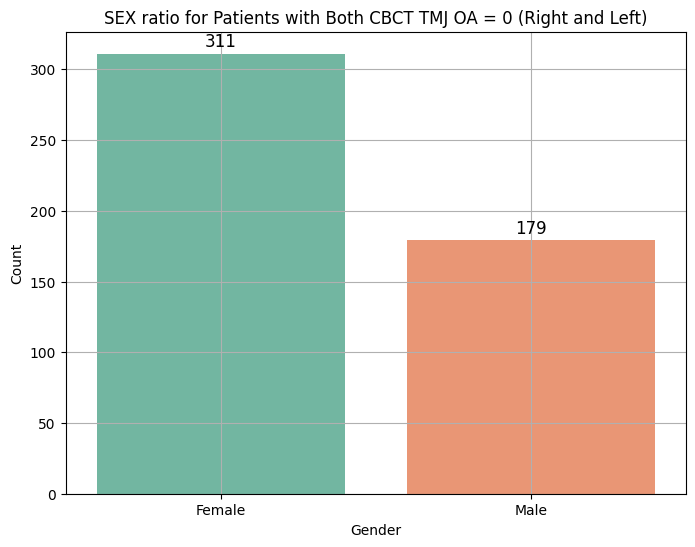

In [ ]:
# CBCT_Rt OA와 CBCT_Lt OA가 모두 OA(1)인 경우만 필터링
both_oa_df = df[(df['CBCT_Rt OA (Osteoarthritis) (0=normal, 1=OA)'] == 0) &
                (df['CBCT_Lt OA  (Osteoarthritis) (0=normal, 1=OA)'] == 0)]

# 성별을 0=Female, 1=Male로 맵핑 (필요시)
both_oa_df['SEX'] = both_oa_df['SEX'].map({0: 'Female', 1: 'Male'})

# 성별에 따른 CBCT OA 여부 시각화 (카운트 플롯)
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='SEX', data=both_oa_df, palette='Set2')

# 막대 위에 숫자(빈도 수) 표시
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# 그래프 제목 및 축 레이블 설정
plt.title('SEX ratio for Patients with Both CBCT TMJ OA = 0 (Right and Left)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(True)

# 그래프 출력
plt.show()

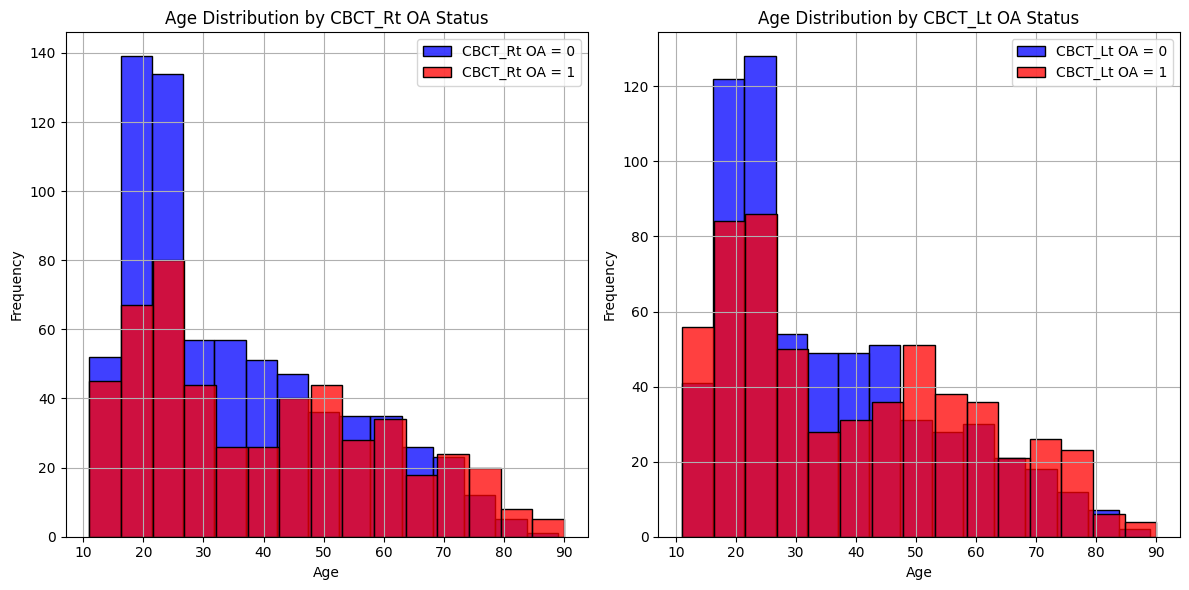

In [ ]:
# 서브플롯을 사용하여 CBCT_Rt OA와 CBCT_Lt OA 상태에 따른 나이 분포 비교
plt.figure(figsize=(12, 6))

# CBCT_Rt OA 상태에 따른 나이 분포 (히스토그램)
plt.subplot(1, 2, 1)
sns.histplot(df[df['CBCT_Rt OA (Osteoarthritis) (0=normal, 1=OA)'] == 0]['AGE'], color='blue', label='CBCT_Rt OA = 0', bins=15)
sns.histplot(df[df['CBCT_Rt OA (Osteoarthritis) (0=normal, 1=OA)'] == 1]['AGE'], color='red', label='CBCT_Rt OA = 1', bins=15)
plt.title('Age Distribution by CBCT_Rt OA Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

# CBCT_Lt OA 상태에 따른 나이 분포 (히스토그램)
plt.subplot(1, 2, 2)
sns.histplot(df[df['CBCT_Lt OA  (Osteoarthritis) (0=normal, 1=OA)'] == 0]['AGE'], color='blue', label='CBCT_Lt OA = 0', bins=15)
sns.histplot(df[df['CBCT_Lt OA  (Osteoarthritis) (0=normal, 1=OA)'] == 1]['AGE'], color='red', label='CBCT_Lt OA = 1', bins=15)
plt.title('Age Distribution by CBCT_Lt OA Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
